# Spline Interpolations of a given analytic function

## 0. Definitions of Plotting parameters

In [1]:
import numpy as np

a, b, n_plot = -1, 1, 1000
x_plot = np.linspace(a, b, n_plot)
# print("x_plot =", x_plot)

## 1. Definition of f

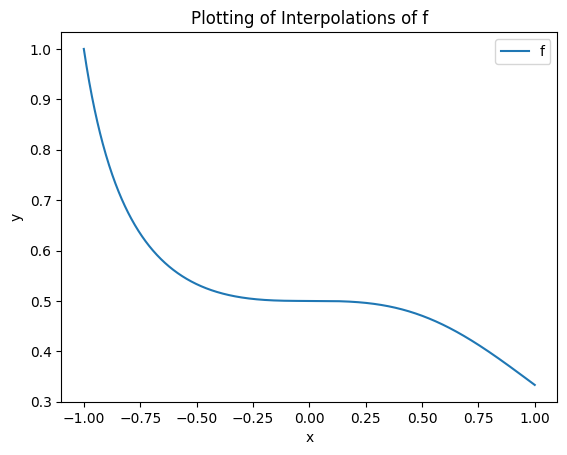

In [2]:
from utils import *

# f_exp = "cos(x)" # "1/(1+x**2)"
# def f(x):
    # return eval(f_exp, {"x": x})

f = lambda x: 1/(2+x**3)

fig, ax = set_fig()
plot_f(ax, f, x_plot)

## 2. Definition of Interpolation parameters

In [3]:
n = 10

# Defintion of Uniforms points
x_uniform = np.linspace(a, b, n)
y_uniform = [f(x) for x in x_uniform]
print("Uniforms points")
print("x_uniform =", x_uniform)
print("\ny_uniform =", y_uniform)

Uniforms points
x_uniform = [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]

y_uniform = [1.0, 0.6538116591928251, 0.5468867216804201, 0.5094339622641509, 0.5003431708991077, 0.49965729952021937, 0.49090909090909085, 0.46051800379027164, 0.40477512493059414, 0.3333333333333333]


## 3. Test of Linear Spline Interpolation

In [4]:
from k_math_kit.polynomial.newton_poly import  Spline1Poly

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
print("x =", x)
print("y =", y)
polynomial = Spline1Poly(x, y)
print(polynomial)

x = 1.5
value = polynomial.horner_eval(x)
print(f"P({x}) = {value}")

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
P(x) =	 1.0 + 3.0 * (x - 1.0)   if x in [1.0, 2.0]
	 4.0 + 5.0 * (x - 2.0)   if x in [2.0, 3.0]
	 9.0 + 7.0 * (x - 3.0)   if x in [3.0, 4.0]
	 16.0 + 9.0 * (x - 4.0)   if x in [4.0, 5.0]
	 25.0 + 11.0 * (x - 5.0)   if x in [5.0, 6.0]
	 36.0 + 13.0 * (x - 6.0)   if x in [6.0, 7.0]
	 49.0 + 15.0 * (x - 7.0)   if x in [7.0, 8.0]
	 64.0 + 17.0 * (x - 8.0)   if x in [8.0, 9.0]
	 81.0 + 19.0 * (x - 9.0)   if x in [9.0, 10.0]

P(1.5) = 2.5


## 4. Uniform Linear Spline Interpolation of f

Uni_linear_spline_poly(x) =	 1.0 + (-1.55784753363) * (x + 1.0)   if x in [-1.0, -0.7777777777777778]
	 0.65381165919 + (-0.48116221881) * (x + 0.77777777778)   if x in [-0.7777777777777778, -0.5555555555555556]
	 0.54688672168 + (-0.16853741737) * (x + 0.55555555556)   if x in [-0.5555555555555556, -0.33333333333333337]
	 0.50943396226 + (-0.04090856114) * (x + 0.33333333333)   if x in [-0.33333333333333337, -0.11111111111111116]
	 0.5003431709 + (-0.0030864212) * (x + 0.11111111111)   if x in [-0.11111111111111116, 0.11111111111111116]
	 0.49965729952 + (-0.03936693875) * (x - 0.11111111111)   if x in [0.11111111111111116, 0.33333333333333326]
	 0.49090909091 + (-0.13675989203) * (x - 0.33333333333)   if x in [0.33333333333333326, 0.5555555555555554]
	 0.46051800379 + (-0.25084295487) * (x - 0.55555555556)   if x in [0.5555555555555554, 0.7777777777777777]
	 0.40477512493 + (-0.32148806219) * (x - 0.77777777778)   if x in [0.7777777777777777, 1.0]


Uni_linear_spline_poly(1) = 0.3333

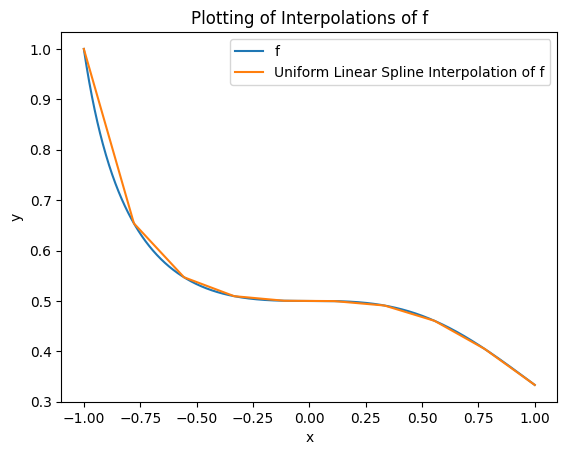

In [5]:
uni_linear_spline_poly = Spline1Poly(x_uniform, y_uniform, "Uni_linear_spline_poly")

print(uni_linear_spline_poly)

x0 = 1
print(f"\nUni_linear_spline_poly({x0}) =", uni_linear_spline_poly.horner_eval(x0))

# print("\nx_uniform =", x_uniform)
# print("\ny_uniform =", y_uniform)

fig, ax = set_fig()
plot_f(ax, f, x_plot)

uni_linear_spline_poly.plot(ax, "Uniform Linear Spline Interpolation of f")

## 5. Uniform Cubic Spline Interpolation of f

Uni_spline3_poly(x) =	 1.0 + (-1.826136) * (x + 1.0) + 5.432837 * (x + 1.0)^3   if x in [-1.0, -0.7777777777777778]
	 0.653812 + (-1.021271) * (x + 0.777778) + 3.621892 * (x + 0.777778)^2 + (-5.361309) * (x + 0.777778)^3   if x in [-0.7777777777777778, -0.5555555555555556]
	 0.546887 + (-0.205809) * (x + 0.555556) + 0.047686 * (x + 0.555556)^2 + 0.540173 * (x + 0.555556)^3   if x in [-0.5555555555555556, -0.33333333333333337]
	 0.509434 + (-0.10459) * (x + 0.333333) + 0.407801 * (x + 0.333333)^2 + (-0.545553) * (x + 0.333333)^3   if x in [-0.33333333333333337, -0.11111111111111116]
	 0.500343 + (-0.004168) * (x + 0.111111) + 0.044099 * (x + 0.111111)^2 + (-0.176549) * (x + 0.111111)^3   if x in [-0.11111111111111116, 0.11111111111111116]
	 0.499657 + (-0.010723) * (x - 0.111111) + (-0.0736) * (x - 0.111111)^2 + (-0.248832) * (x - 0.111111)^3   if x in [0.11111111111111116, 0.33333333333333326]
	 0.490909 + (-0.080298) * (x - 0.333333) + (-0.239488) * (x - 0.333333)^2 + (-0.065651) * (x

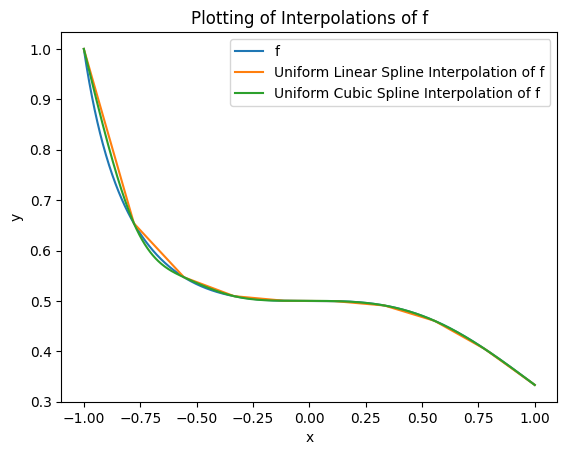

In [6]:
from k_math_kit.polynomial.taylor_poly import Spline3Polys
      
uni_spline3_poly = Spline3Polys(x_uniform, y_uniform, "Uni_spline3_poly")

print(uni_spline3_poly)

x0 = 1
print(f"\nUni_spline3_poly({x0}) =", uni_spline3_poly.horner_eval(x0))

fig, ax = set_fig()
plot_f(ax, f, x_plot)

# print("\nx_uniform =", x_uniform)
# print("\ny_uniform =", y_uniform)

uni_linear_spline_poly.plot(ax, "Uniform Linear Spline Interpolation of f")
uni_spline3_poly.plot(ax, n_plot, "Uniform Cubic Spline Interpolation of f")

## 6. Errors of SPline Interpolations of f

err_spline1 = 0.0006928093124588687
err_spline3 = 0.0005946540406200942


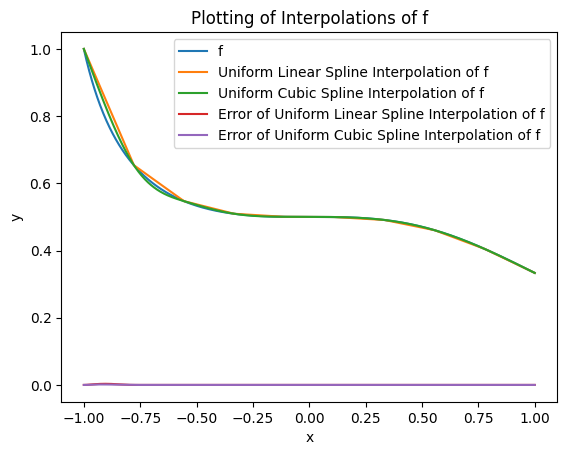

In [7]:
from k_math_kit.integration import gauss_integration

func_err_spline1 = lambda x: (f(x) - uni_linear_spline_poly.horner_eval(x))**2
func_err_spline3 = lambda x: (f(x) - uni_spline3_poly.horner_eval(x))**2
err_spline1 = sqrt(gauss_integration(func_err_spline1, a, b))
err_spline3 = sqrt(gauss_integration(func_err_spline3, a, b))
print("err_spline1 =", err_spline1)
print("err_spline3 =", err_spline3)

fig, ax = set_fig()

plot_f(ax, f, x_plot)
uni_linear_spline_poly.plot(ax, "Uniform Linear Spline Interpolation of f")
uni_spline3_poly.plot(ax, n_plot, "Uniform Cubic Spline Interpolation of f")

y_uni_plot = [func_err_spline1(x) for x  in x_plot]
ax.plot(x_plot, y_uni_plot, label="Error of Uniform Linear Spline Interpolation of f")

y_tche_plot = [func_err_spline3(x) for x  in x_plot]
ax.plot(x_plot, y_tche_plot, label="Error of Uniform Cubic Spline Interpolation of f")

ax.legend()
